# POSTTEST 7 KECERDASAN BUATAN
*Maulana Muhammad Hafidz / 2109106070*

In [4]:
!unzip archive.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: data/cloudy/train_23566.jpg  
  inflating: data/cloudy/train_23598.jpg  
  inflating: data/cloudy/train_23608.jpg  
  inflating: data/cloudy/train_23634.jpg  
  inflating: data/cloudy/train_23636.jpg  
  inflating: data/cloudy/train_23646.jpg  
  inflating: data/cloudy/train_2366.jpg  
  inflating: data/cloudy/train_23664.jpg  
  inflating: data/cloudy/train_23706.jpg  
  inflating: data/cloudy/train_2380.jpg  
  inflating: data/cloudy/train_23805.jpg  
  inflating: data/cloudy/train_23806.jpg  
  inflating: data/cloudy/train_23826.jpg  
  inflating: data/cloudy/train_23843.jpg  
  inflating: data/cloudy/train_23877.jpg  
  inflating: data/cloudy/train_23884.jpg  
  inflating: data/cloudy/train_23953.jpg  
  inflating: data/cloudy/train_2396.jpg  
  inflating: data/cloudy/train_23978.jpg  
  inflating: data/cloudy/train_23979.jpg  
  inflating: data/cloudy/train_23980.jpg  
  inflating: data/cloudy/train_23981.jpg 

In [5]:
import tensorflow as tf
import shutil
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16
import seaborn as sns
from tensorflow.keras import Sequential
import os
from pathlib import Path
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

### Membaca Dataset

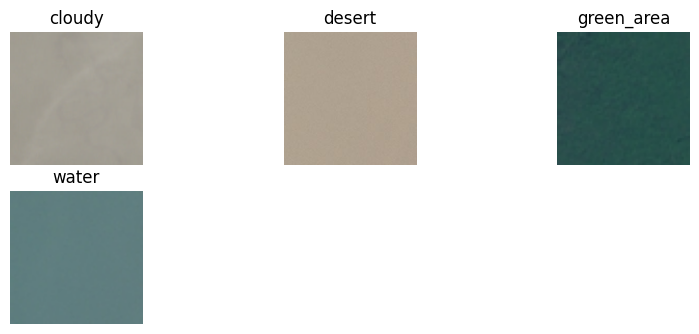

In [6]:
data_dir = 'sample_data//data'
class_names = ['cloudy', 'desert', 'green_area', 'water']

plt.figure(figsize=(10, 10))

for i in range(4):
    class_dir = os.path.join(data_dir, class_names[i])
    image_files = os.listdir(class_dir)

    if image_files:
        image_path = os.path.join(class_dir, image_files[0])
        image = plt.imread(image_path)

        plt.subplot(5, 3, i + 1)
        plt.imshow(image)
        plt.title(class_names[i])
        plt.axis('off')

plt.show()

In [7]:
# Path ke direktori utama yang berisi semua folder kelas
dataset_dir = 'sample_data//data'

# Proporsi pembagian dataset
train_ratio = 0.6 # Proporsi data pelatihan
val_ratio = 0.2  # Proporsi data validasi
test_ratio = 0.2  # Proporsi data pengujian

# Nama-nama folder kelas
class_names = [
    'cloudy',
    'desert',
    'green_area',
    'water',
]

# Membagi data untuk setiap kelas
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)

    filenames = os.listdir(class_dir)

    train_files, test_val_files = train_test_split(filenames, test_size=(val_ratio + test_ratio), random_state=42)
    val_files, test_files = train_test_split(test_val_files, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

    # Membuat direktori untuk setiap subset
    train_dir = os.path.join(dataset_dir, 'train', class_name)
    val_dir = os.path.join(dataset_dir, 'val', class_name)
    test_dir = os.path.join(dataset_dir, 'test', class_name)

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Menyalin gambar ke direktori subset yang sesuai
    for filename in train_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(train_dir, filename)
        shutil.copy(src, dst)

    for filename in val_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(val_dir, filename)
        shutil.copy(src, dst)

    for filename in test_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(test_dir, filename)
        shutil.copy(src, dst)


### Membuat Flow Form Directory

In [8]:
  train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=0.45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [9]:
TRAIN_DIR = 'sample_data//data//train'
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)

Found 2703 images belonging to 4 classes.


In [10]:
VAL_DIR  = 'sample_data//data//val'
val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='validation'
)

Found 675 images belonging to 4 classes.


In [11]:
TEST_DIR  = 'sample_data//data//test'
test_generator = train_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
)

Found 1127 images belonging to 4 classes.


### Membuat Arsitektur CNN

In [12]:
model = Sequential([
    # CNN (Feature Extraction Layer)
    Conv2D(64, 3, activation='relu', input_shape=[ 224, 224, 3], padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(32, 3, activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(16, 3, activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    verbose=1
)

Epoch 1/25
85/85 [==============================] - 53s 483ms/step - loss: 0.6128 - accuracy: 0.6866 - val_loss: 0.4985 - val_accuracy: 0.7630
Epoch 2/25
85/85 [==============================] - 40s 477ms/step - loss: 0.4018 - accuracy: 0.8276 - val_loss: 0.3365 - val_accuracy: 0.8415
Epoch 3/25
85/85 [==============================] - 44s 516ms/step - loss: 0.3667 - accuracy: 0.8387 - val_loss: 0.3672 - val_accuracy: 0.8607
Epoch 4/25
85/85 [==============================] - 41s 483ms/step - loss: 0.3817 - accuracy: 0.8402 - val_loss: 0.5662 - val_accuracy: 0.7807
Epoch 5/25
85/85 [==============================] - 41s 480ms/step - loss: 0.3682 - accuracy: 0.8368 - val_loss: 0.4287 - val_accuracy: 0.7733
Epoch 6/25
85/85 [==============================] - 40s 477ms/step - loss: 0.3513 - accuracy: 0.8528 - val_loss: 0.2999 - val_accuracy: 0.8681
Epoch 7/25
85/85 [==============================] - 42s 490ms/step - loss: 0.3020 - accuracy: 0.8827 - val_loss: 0.3230 - val_accuracy: 0.8504

### Evaluasi Model

In [14]:
loss, acc = model.evaluate(test_generator)
print('Loss : ', loss)
print('Accuracy : ', acc)

36/36 [==============================] - 18s 491ms/step - loss: 0.2053 - accuracy: 0.9281
Loss :  0.20534288883209229
Accuracy :  0.9281277656555176


### Menampilkan Grafik

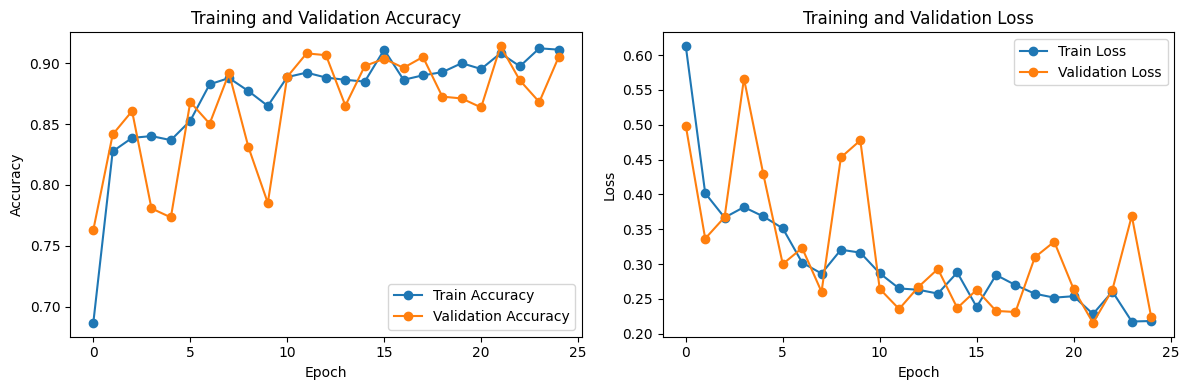

In [15]:
import matplotlib.pyplot as plt

# Dapatkan metrik dari history pelatihan
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot metrik akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot metrik loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
